In [3]:
pip install opencv-contrib-python


  Using cached numpy-2.2.6-cp313-cp313-macosx_14_0_arm64.whl.metadata (62 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.9/46.9 MB 3.4 MB/s eta 0:00:0000:0100:01
Using cached numpy-2.2.6-cp313-cp313-macosx_14_0_arm64.whl (5.1 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 2.3.1
    Uninstalling numpy-2.3.1:
      Successfully uninstalled numpy-2.3.1
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2/2 [opencv-contrib-python]cv-contrib-python]
Note: you may need to restart the kernel to use updated packages.


In [10]:
!conda create -n tf-mac python=3.10 -y
!conda activate tf-mac


Retrieving notices: done
Channels:
 - defaults
Platform: osx-arm64
Solving environment: done

## Package Plan ##

  environment location: /Users/deepanshuagrawal/miniconda3/envs/tf-mac

  added / updated specs:
    - python=3.10


The following NEW packages will be INSTALLED:

  bzip2              pkgs/main/osx-arm64::bzip2-1.0.8-h80987f9_6 
  ca-certificates    pkgs/main/osx-arm64::ca-certificates-2025.2.25-hca03da5_0 
  expat              pkgs/main/osx-arm64::expat-2.7.1-h313beb8_0 
  libcxx             pkgs/main/osx-arm64::libcxx-17.0.6-he5c5206_4 
  libffi             pkgs/main/osx-arm64::libffi-3.4.4-hca03da5_1 
  ncurses            pkgs/main/osx-arm64::ncurses-6.4-h313beb8_0 
  openssl            pkgs/main/osx-arm64::openssl-3.0.16-h02f6b3c_0 
  pip                pkgs/main/noarch::pip-25.1-pyhc872135_2 
  python             pkgs/main/osx-arm64::python-3.10.18-h19e8193_0 
  readline           pkgs/main/osx-arm64::readline-8.2-h1a28f6b_0 
  setuptools         pkgs/main/osx-arm64::

In [2]:
!pip install numpy
!pip install pandas
!pip install opencv-python
!pip install tqdm
!pip install scikit-learn
!pip install kagglehub
!pip install tensorflow-macos
!pip install tensorflow-metal


  Using cached tqdm-4.67.1-py3-none-any.whl.metadata (57 kB)
Using cached tqdm-4.67.1-py3-none-any.whl (78 kB)
  Using cached kagglehub-0.3.12-py3-none-any.whl.metadata (38 kB)
  Using cached PyYAML-6.0.2-cp310-cp310-macosx_11_0_arm64.whl.metadata (2.1 kB)
Using cached kagglehub-0.3.12-py3-none-any.whl (67 kB)
Using cached PyYAML-6.0.2-cp310-cp310-macosx_11_0_arm64.whl (171 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2/2 [kagglehub]
  Using cached tensorflow_metal-1.2.0-cp310-cp310-macosx_12_0_arm64.whl.metadata (1.3 kB)
Using cached tensorflow_metal-1.2.0-cp310-cp310-macosx_12_0_arm64.whl (1.4 MB)


In [3]:
import os
import pandas as pd
import cv2
import numpy as np
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
import kagglehub

# ✅ Download dataset
path = kagglehub.dataset_download("meowmeowmeowmeowmeow/gtsrb-german-traffic-sign")

# ✅ Config
IMG_SIZE = 32
NUM_CLASSES = 43

def load_data(csv_filename, folder_name):
    csv_path = os.path.join(path, csv_filename)
    df = pd.read_csv(csv_path)

    X = []
    y = []

    print(f"Loading data from {csv_filename}...")

    for i in tqdm(range(len(df))):
        img_path = os.path.join(path, df.iloc[i]["Path"])
        img = cv2.imread(img_path)

        if img is None:
            continue

        img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        X.append(img)
        y.append(df.iloc[i]["ClassId"])

    return np.array(X), np.array(y)

# ✅ Load training and testing data
X_train, y_train = load_data("Train.csv", "Train")
X_test, y_test = load_data("Test.csv", "Test")

# ✅ Normalize pixel values to [0,1]
X_train = X_train / 255.0
X_test = X_test / 255.0

# ✅ One-hot encode labels
y_train = to_categorical(y_train, num_classes=NUM_CLASSES)
y_test = to_categorical(y_test, num_classes=NUM_CLASSES)

# ✅ Optional: Split training data into training + validation
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train,
                                                  test_size=0.2, random_state=42)

# ✅ Final shapes
print("Training set:", X_train.shape, y_train.shape)
print("Validation set:", X_val.shape, y_val.shape)
print("Test set:", X_test.shape, y_test.shape)


/Users/deepanshuagrawal/trafficsignal/.venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Loading data from Train.csv...


100%|██████████| 39209/39209 [00:09<00:00, 4212.14it/s]


Loading data from Test.csv...


100%|██████████| 12630/12630 [00:02<00:00, 4493.37it/s]


Training set: (31367, 32, 32, 3) (31367, 43)
Validation set: (7842, 32, 32, 3) (7842, 43)
Test set: (12630, 32, 32, 3) (12630, 43)


In [4]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# 1️⃣ Define the model
model = Sequential([
    Input(shape=(32, 32, 3)),  # ✅ Recommended in Keras 3
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(43, activation='softmax')  # 43 traffic sign classes
])

# 2️⃣ Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# 3️⃣ Callbacks
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# ✅ Save using new .keras format (recommended in Keras 3)
checkpoint = ModelCheckpoint("best_model2.keras",  # ⬅ updated filename and format
                             monitor='val_accuracy',
                             save_best_only=True,
                             verbose=1)

# 4️⃣ Train the model
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=30,
    batch_size=64,
    callbacks=[early_stop, checkpoint]
)


2025-07-08 08:53:10.703587: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1
2025-07-08 08:53:10.704087: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 8.00 GB
2025-07-08 08:53:10.704886: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 2.67 GB
2025-07-08 08:53:10.705018: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2025-07-08 08:53:10.705371: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Epoch 1/30


2025-07-08 08:53:13.069477: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.
2025-07-08 08:53:13.117033: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node Adam/AssignAddVariableOp.


491/491 [==============================] - ETA: 0s - loss: 2.0790 - accuracy: 0.4151
Epoch 1: val_accuracy improved from -inf to 0.80655, saving model to best_model2.keras
491/491 [==============================] - 15s 23ms/step - loss: 2.0790 - accuracy: 0.4151 - val_loss: 0.6194 - val_accuracy: 0.8066
Epoch 2/30
488/491 [============================>.] - ETA: 0s - loss: 0.5476 - accuracy: 0.8328
Epoch 2: val_accuracy improved from 0.80655 to 0.94542, saving model to best_model2.keras
491/491 [==============================] - 9s 19ms/step - loss: 0.5464 - accuracy: 0.8332 - val_loss: 0.1950 - val_accuracy: 0.9454
Epoch 3/30
491/491 [==============================] - ETA: 0s - loss: 0.2482 - accuracy: 0.9259
Epoch 3: val_accuracy improved from 0.94542 to 0.97195, saving model to best_model2.keras
491/491 [==============================] - 9s 19ms/step - loss: 0.2482 - accuracy: 0.9259 - val_loss: 0.1125 - val_accuracy: 0.9719
Epoch 4/30
491/491 [==============================] - ETA: 

In [6]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# 1️⃣ Define the model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(43, activation='softmax')  # 43 traffic sign classes
])

# 2️⃣ Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# 3️⃣ Set up early stopping and checkpoint saving
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
checkpoint = ModelCheckpoint("best_model.h5", monitor='val_accuracy',
                             save_best_only=True, verbose=1)

# 4️⃣ Train the model
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=30,
    batch_size=64,
    callbacks=[early_stop, checkpoint]
)


/Users/deepanshuagrawal/miniconda3/envs/tf-mac/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-07-07 22:52:28.487340: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1
2025-07-07 22:52:28.487801: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 8.00 GB
2025-07-07 22:52:28.488423: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 2.67 GB
2025-07-07 22:52:28.488865: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2025-07-07 22:52:28.489105: I tensorflow/core/common_runtime/pluggable_device/pluggab

Epoch 1/30


2025-07-07 22:52:31.205903: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


491/491 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.2454 - loss: 2.7849
Epoch 1: val_accuracy improved from -inf to 0.85603, saving model to best_model.h5


491/491 ━━━━━━━━━━━━━━━━━━━━ 18s 27ms/step - accuracy: 0.2458 - loss: 2.7833 - val_accuracy: 0.8560 - val_loss: 0.4850
Epoch 2/30
489/491 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.8102 - loss: 0.6303
Epoch 2: val_accuracy improved from 0.85603 to 0.95562, saving model to best_model.h5


491/491 ━━━━━━━━━━━━━━━━━━━━ 12s 25ms/step - accuracy: 0.8105 - loss: 0.6294 - val_accuracy: 0.9556 - val_loss: 0.1629
Epoch 3/30
491/491 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.9252 - loss: 0.2591
Epoch 3: val_accuracy improved from 0.95562 to 0.97654, saving model to best_model.h5


491/491 ━━━━━━━━━━━━━━━━━━━━ 12s 25ms/step - accuracy: 0.9252 - loss: 0.2590 - val_accuracy: 0.9765 - val_loss: 0.0893
Epoch 4/30
491/491 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.9506 - loss: 0.1668
Epoch 4: val_accuracy did not improve from 0.97654
491/491 ━━━━━━━━━━━━━━━━━━━━ 12s 24ms/step - accuracy: 0.9506 - loss: 0.1668 - val_accuracy: 0.9748 - val_loss: 0.0816
Epoch 5/30
491/491 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.9666 - loss: 0.1140
Epoch 5: val_accuracy did not improve from 0.97654
491/491 ━━━━━━━━━━━━━━━━━━━━ 12s 24ms/step - accuracy: 0.9666 - loss: 0.1140 - val_accuracy: 0.9733 - val_loss: 0.1000
Epoch 6/30
491/491 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.9736 - loss: 0.0876
Epoch 6: val_accuracy improved from 0.97654 to 0.98661, saving model to best_model.h5


491/491 ━━━━━━━━━━━━━━━━━━━━ 12s 25ms/step - accuracy: 0.9736 - loss: 0.0876 - val_accuracy: 0.9866 - val_loss: 0.0595
Epoch 7/30
490/491 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.9807 - loss: 0.0663
Epoch 7: val_accuracy improved from 0.98661 to 0.98750, saving model to best_model.h5


491/491 ━━━━━━━━━━━━━━━━━━━━ 12s 25ms/step - accuracy: 0.9807 - loss: 0.0663 - val_accuracy: 0.9875 - val_loss: 0.0509
Epoch 8/30
490/491 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.9800 - loss: 0.0647
Epoch 8: val_accuracy improved from 0.98750 to 0.98776, saving model to best_model.h5


491/491 ━━━━━━━━━━━━━━━━━━━━ 12s 25ms/step - accuracy: 0.9800 - loss: 0.0647 - val_accuracy: 0.9878 - val_loss: 0.0591
Epoch 9/30
491/491 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.9793 - loss: 0.0765
Epoch 9: val_accuracy improved from 0.98776 to 0.99146, saving model to best_model.h5


491/491 ━━━━━━━━━━━━━━━━━━━━ 12s 24ms/step - accuracy: 0.9793 - loss: 0.0765 - val_accuracy: 0.9915 - val_loss: 0.0423
Epoch 10/30
490/491 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.9853 - loss: 0.0573
Epoch 10: val_accuracy did not improve from 0.99146
491/491 ━━━━━━━━━━━━━━━━━━━━ 12s 24ms/step - accuracy: 0.9853 - loss: 0.0573 - val_accuracy: 0.9887 - val_loss: 0.0578
Epoch 11/30
490/491 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.9881 - loss: 0.0440
Epoch 11: val_accuracy did not improve from 0.99146
491/491 ━━━━━━━━━━━━━━━━━━━━ 12s 25ms/step - accuracy: 0.9881 - loss: 0.0440 - val_accuracy: 0.9870 - val_loss: 0.0608
Epoch 12/30
489/491 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.9873 - loss: 0.0472
Epoch 12: val_accuracy did not improve from 0.99146
491/491 ━━━━━━━━━━━━━━━━━━━━ 12s 24ms/step - accuracy: 0.9873 - loss: 0.0473 - val_accuracy: 0.9847 - val_loss: 0.0660
Epoch 13/30
491/491 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.9873 - loss: 0.0458
Epoch 13: val_ac

In [29]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# 1️⃣ Define the model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(43, activation='softmax')  # 43 traffic sign classes
])

# 2️⃣ Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# 3️⃣ Set up early stopping and checkpoint saving
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
checkpoint = ModelCheckpoint("best_model1.keras", monitor='val_accuracy',save_best_only=True, verbose=1)

# 4️⃣ Train the model
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=30,
    batch_size=64,
    callbacks=[early_stop, checkpoint]
)


Epoch 1/30
491/491 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.2297 - loss: 2.8580
Epoch 1: val_accuracy improved from -inf to 0.87516, saving model to best_model1.keras
491/491 ━━━━━━━━━━━━━━━━━━━━ 15s 27ms/step - accuracy: 0.2301 - loss: 2.8562 - val_accuracy: 0.8752 - val_loss: 0.4565
Epoch 2/30
489/491 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.8349 - loss: 0.5377
Epoch 2: val_accuracy improved from 0.87516 to 0.96238, saving model to best_model1.keras
491/491 ━━━━━━━━━━━━━━━━━━━━ 13s 26ms/step - accuracy: 0.8351 - loss: 0.5369 - val_accuracy: 0.9624 - val_loss: 0.1497
Epoch 3/30
489/491 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.9378 - loss: 0.2089
Epoch 3: val_accuracy improved from 0.96238 to 0.96914, saving model to best_model1.keras
491/491 ━━━━━━━━━━━━━━━━━━━━ 12s 25ms/step - accuracy: 0.9378 - loss: 0.2088 - val_accuracy: 0.9691 - val_loss: 0.1129
Epoch 4/30
490/491 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.9655 - loss: 0.1226
Epoch 4: val_accuracy improv

In [6]:
model.save("best_model2.keras")


In [5]:
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print("🎯 Test Accuracy:", round(test_acc * 100, 2), "%")


395/395 - 3s - loss: 0.3815 - accuracy: 0.9515 - 3s/epoch - 8ms/step
🎯 Test Accuracy: 95.15 %


In [10]:
!pip install matplotlib


  Using cached matplotlib-3.10.3-cp310-cp310-macosx_11_0_arm64.whl.metadata (11 kB)
  Using cached contourpy-1.3.2-cp310-cp310-macosx_11_0_arm64.whl.metadata (5.5 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.58.5-cp310-cp310-macosx_10_9_universal2.whl.metadata (106 kB)
  Using cached kiwisolver-1.4.8-cp310-cp310-macosx_11_0_arm64.whl.metadata (6.2 kB)
  Using cached pillow-11.3.0-cp310-cp310-macosx_11_0_arm64.whl.metadata (9.0 kB)
  Using cached pyparsing-3.2.3-py3-none-any.whl.metadata (5.0 kB)
Using cached matplotlib-3.10.3-cp310-cp310-macosx_11_0_arm64.whl (8.0 MB)
Using cached contourpy-1.3.2-cp310-cp310-macosx_11_0_arm64.whl (253 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
Using cached fonttools-4.58.5-cp310-cp310-macosx_10_9_universal2.whl (2.7 MB)
Using cached kiwisolver-1.4.8-cp310-cp310-macosx_11_0_arm64.whl (65 kB)
Using cached pillow-11.3.0-cp310-cp310-macosx_11_0_arm64.whl (4.7 MB)
Using cached pyparsing-3.2.3-p

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 351ms/step


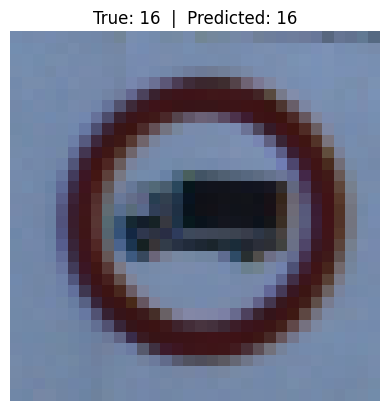

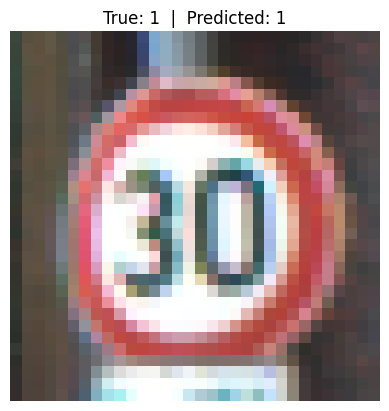

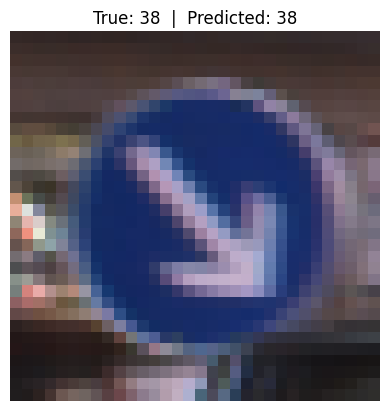

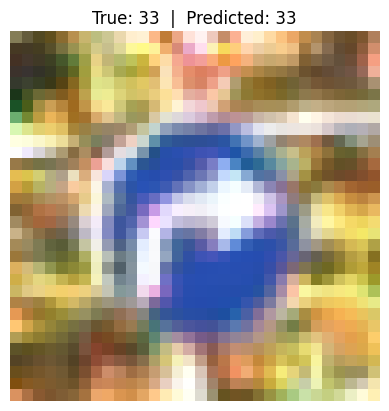

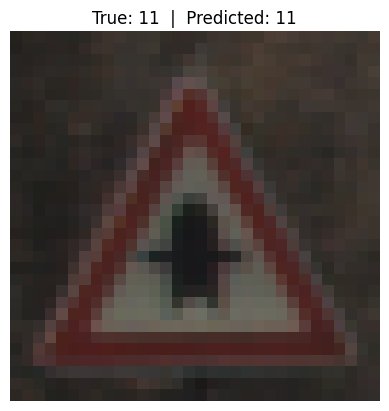

In [11]:
import matplotlib.pyplot as plt

def show_predictions(n=10):
    preds = model.predict(X_test[:n])
    pred_classes = np.argmax(preds, axis=1)
    true_classes = np.argmax(y_test[:n], axis=1)

    for i in range(n):
        plt.imshow(X_test[i])
        plt.title(f"True: {true_classes[i]}  |  Predicted: {pred_classes[i]}")
        plt.axis('off')
        plt.show()

show_predictions(5)


In [13]:
from PIL import Image
import numpy as np
import cv2

def load_and_preprocess(img_path, size=32):
    img = Image.open(img_path).convert("RGB")
    img = img.resize((size, size))
    img = np.array(img) / 255.0
    return np.expand_dims(img, axis=0)

img = load_and_preprocess("dir.jpg")
pred = model.predict(img)
print("Predicted class:", np.argmax(pred))


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 747ms/step
Predicted class: 17


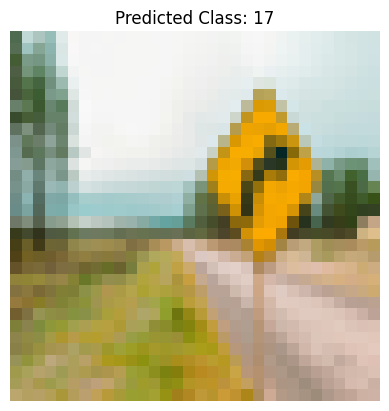

In [14]:
import matplotlib.pyplot as plt

plt.imshow(img[0])  # `img` is already preprocessed and expanded
plt.title(f"Predicted Class: {np.argmax(pred)}")
plt.axis('off')
plt.show()


In [12]:
gtsrb_labels = {
    0: "Speed limit (20km/h)",
    1: "Speed limit (30km/h)",
    2: "Speed limit (50km/h)",
    3: "Speed limit (60km/h)",
    4: "Speed limit (70km/h)",
    5: "Speed limit (80km/h)",
    6: "End of speed limit (80km/h)",
    7: "Speed limit (100km/h)",
    8: "Speed limit (120km/h)",
    9: "No passing",
    10: "No passing for vehicles over 3.5 metric tons",
    11: "Right-of-way at the next intersection",
    12: "Priority road",
    13: "Yield",
    14: "Stop",
    15: "No vehicles",
    16: "Vehicles over 3.5 metric tons prohibited",
    17: "No entry",
    18: "General caution",
    19: "Dangerous curve to the left",
    20: "Dangerous curve to the right",
    21: "Double curve",
    22: "Bumpy road",
    23: "Slippery road",
    24: "Road narrows on the right",
    25: "Road work",
    26: "Traffic signals",
    27: "Pedestrians",
    28: "Children crossing",
    29: "Bicycles crossing",
    30: "Beware of ice/snow",
    31: "Wild animals crossing",
    32: "End of all speed and passing limits",
    33: "Turn right ahead",
    34: "Turn left ahead",
    35: "Ahead only",
    36: "Go straight or right",
    37: "Go straight or left",
    38: "Keep right",
    39: "Keep left",
    40: "Roundabout mandatory",
    41: "End of no passing",
    42: "End of no passing by vehicles over 3.5 metric tons"
}

print("🛑 Predicted Label:", gtsrb_labels[np.argmax(pred)])


🛑 Predicted Label: Priority road


1/1 [==============================] - 0s 18ms/step
Predicted class: 2


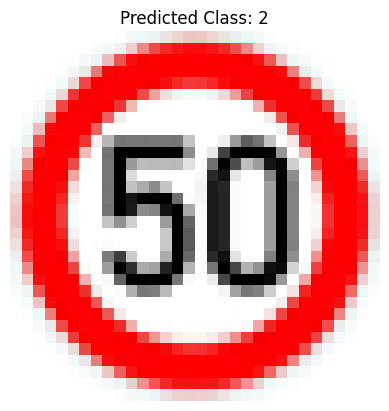

🛑 Predicted Label: Speed limit (50km/h)


In [15]:
from PIL import Image
import numpy as np
import cv2
import matplotlib.pyplot as plt
def load_and_preprocess(img_path, size=32):
    img = Image.open(img_path).convert("RGB")
    img = img.resize((size, size))
    img = np.array(img) / 255.0
    return np.expand_dims(img, axis=0)

img = load_and_preprocess("images-2.jpeg")
pred = model.predict(img)
print("Predicted class:", np.argmax(pred))
plt.imshow(img[0])  # `img` is already preprocessed and expanded
plt.title(f"Predicted Class: {np.argmax(pred)}")
plt.axis('off')
plt.show()
print("🛑 Predicted Label:", gtsrb_labels[np.argmax(pred)])


In [22]:
# Save in modern format
model.save("traffic_sign_model.keras")

# Later load it like this
model = tf.keras.models.load_model("traffic_sign_model.keras")


/Users/deepanshuagrawal/miniconda3/envs/tf-mac/lib/python3.10/site-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 12 variables whereas the saved optimizer has 22 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))
